## Image classification with Tensorflow: Fashion MNIST

### Context:

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."


### Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

### Kernel: 

In this kernel, we'll use TensorFlow and its Keras high-level neural network API to build neural networks to classify fashion images into 10 classes stated above.

We'll use both traditional neural network and convolutional neural network.

### 1. Traditional multi-layer perceptron neural network

In [8]:
# Load the dataset:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, InputLayer
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [10]:
# Split the dataset and do our preprocessing:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [73]:
# Print out the shape of the dataset:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [13]:
# Data preprocessing
input_dim = 784  # 28*28 is the original 2D image. We transform our 2D dataset to 1D
output_dim = nb_classes = 10 # 10 fashion categories --> 10 classes

# Reshape the dataset to fit neural network:
X_train = X_train.reshape(60000, input_dim) # 60000 is the amount of train entries
X_test = X_test.reshape(10000, input_dim) # 10000 is the amount of test entries
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # normalize each vector by dividing each element by 255 (this is the maximum value of the RGB color scale)
X_test /= 255

In [14]:
# One hot code our target variable using to_categorical function of Keras' utils module
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [15]:
# Take a look at the shape of X_train. We have 60000 rows and 784 features
X_train.shape

(60000, 784)

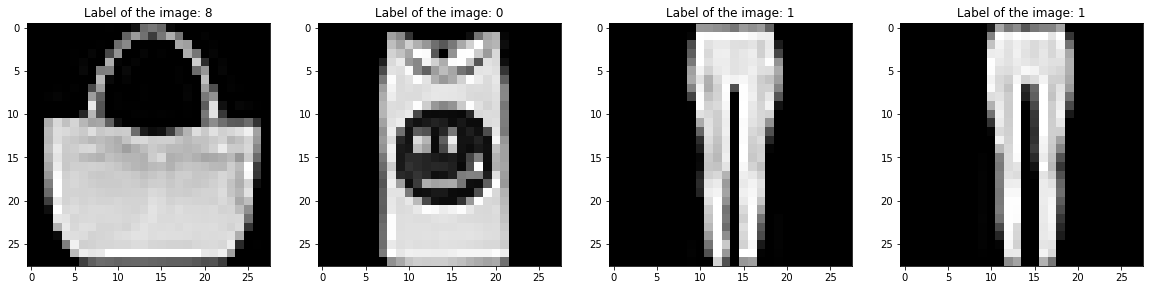

In [18]:
# Take a look at some of the original images:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.imshow(X_train[100].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[100]))

plt.subplot(1,4,2)
plt.imshow(X_train[101].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[101]))

plt.subplot(1,4,3)
plt.imshow(X_train[102].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[102]))

plt.subplot(1,4,4)
plt.imshow(X_train[103].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[103]))

plt.show()

In [23]:
# Defining the model:

model = Sequential()
# our first dense layer
model.add(Dense(1028, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(1028, activation="relu"))
# our third dense layer
model.add(Dense(256, activation="relu"))
# our fourth dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [24]:
# Print out model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1028)              806980    
_________________________________________________________________
dense_4 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               263424    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 2,145,314
Trainable params: 2,145,314
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compiling the model:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 29s 488us/sample - loss: 0.9308 - accuracy: 0.7154
Epoch 2/20
60000/60000 [==============================] - 27s 450us/sample - loss: 0.5562 - accuracy: 0.8115
Epoch 3/20
60000/60000 [==============================] - 27s 446us/sample - loss: 0.4915 - accuracy: 0.8292
Epoch 4/20
60000/60000 [==============================] - 27s 450us/sample - loss: 0.4541 - accuracy: 0.8407
Epoch 5/20
60000/60000 [==============================] - 27s 446us/sample - loss: 0.4324 - accuracy: 0.8486
Epoch 6/20
60000/60000 [==============================] - 27s 455us/sample - loss: 0.4143 - accuracy: 0.8551
Epoch 7/20
60000/60000 [==============================] - 27s 448us/sample - loss: 0.4003 - accuracy: 0.8583
Epoch 8/20
60000/60000 [==============================] - 27s 451us/sample - loss: 0.3868 - accuracy: 0.8648
Epoch 9/20
60000/60000 [==============================] - 27s 449us/sample - loss: 0.3766 - accuracy: 0.8

In [26]:
# Print out the testing score:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3604444666981697
Test accuracy: 0.8715


Using Dense layer, and 4 hidden layers, we gained an accuracy score of 87%. This is pretty good, but I believe we can do better. Let's try using convolutional neural network (CNN) to see if we can improve our result.

### 2. Convolutional neural network using Conv2D and MaxPooling2D

In [31]:
# Reload the dataset and split it into train and test set:
(X1_train, y1_train), (X1_test, y1_test) = fashion_mnist.load_data()

In [32]:
# One hot code our target variable using to_categorical function of Keras' utils module
Y1_train = to_categorical(y1_train, nb_classes)
Y1_test = to_categorical(y1_test, nb_classes)

In [66]:
# Reshape X1_train and X1_test to fit CNNs
X1_train = X1_train.reshape(X1_train.shape[0], 28, 28, 1)
X1_test = X1_test.reshape(X1_test.shape[0], 28, 28, 1)

In [67]:
# Inspect the shape of our new dataset:
print(X1_train.shape, Y1_train.shape)
print(X1_test.shape, Y1_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [68]:
# Defining the model:
cnn = Sequential()

# Define input layer:
cnn.add(tf.keras.layers.InputLayer(input_shape=(28,28,1)))
# Normalization
cnn.add(tf.keras.layers.BatchNormalization())

# Conv + Maxpooling
cnn.add(tf.keras.layers.Convolution2D(64, (4, 4), padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# Dropout
cnn.add(tf.keras.layers.Dropout(0.1))
    
# Conv + Maxpooling
cnn.add(tf.keras.layers.Convolution2D(64, (4, 4), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# Dropout
cnn.add(tf.keras.layers.Dropout(0.3))

# Converting 3D feature to 1D feature Vector
cnn.add(tf.keras.layers.Flatten())

# Fully Connected Layer
cnn.add(tf.keras.layers.Dense(256, activation='relu'))
# Dropout
cnn.add(tf.keras.layers.Dropout(0.5))
    
# Fully Connected Layer
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
    
# Normalization
cnn.add(tf.keras.layers.BatchNormalization())

# Output layer
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [69]:
# Print model summary:
create_model().summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_20 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        65600     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 5, 5, 64)        

In [70]:
# Compiling the model
cnn.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
cnn.fit(X1_train, Y1_train, batch_size=256, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 139s 2ms/sample - loss: 0.6501 - accuracy: 0.7716
Epoch 2/20
60000/60000 [==============================] - 147s 2ms/sample - loss: 0.3765 - accuracy: 0.8627
Epoch 3/20
60000/60000 [==============================] - 139s 2ms/sample - loss: 0.3249 - accuracy: 0.8824
Epoch 4/20
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.2981 - accuracy: 0.8898
Epoch 5/20
60000/60000 [==============================] - 141s 2ms/sample - loss: 0.2775 - accuracy: 0.8982
Epoch 6/20
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.2603 - accuracy: 0.9039
Epoch 7/20
60000/60000 [==============================] - 137s 2ms/sample - loss: 0.2483 - accuracy: 0.9077
Epoch 8/20
60000/60000 [==============================] - 140s 2ms/sample - loss: 0.2347 - accuracy: 0.9136
Epoch 9/20
60000/60000 [==============================] - 137s 2ms/sample - loss: 0.2295 - accuracy: 0.9145
Epoch

In [72]:
# Print out the testing score:
score = cnn.evaluate(X1_test, Y1_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.2168041356563568
Test accuracy: 0.9233


Our CNN model took quite longer to run (around 140s) per epoch compared to around 30s per epoch using the traditional method. However, our test accuracy using CNN model increased fron 87% to 92%!